In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'OrionLH'
line = 'OrionLH'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

10.433847745911214

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))

In [8]:
table = sosflog(data,-0.05,1)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                  \
       count      mean           std       min       25%       50%       75%   
ils                                                                            
7       50.0  4.055407  6.520422e-02  3.985226  4.006700  4.050739  4.078762   
8      896.0  3.697428  1.084762e-01  3.556424  3.626186  3.673462  3.770945   
9     4256.0  3.316693  1.055095e-01  3.168738  3.221676  3.297957  3.389469   
10   10402.0  2.974161  9.765516e-02  2.824908  2.884292  2.962006  3.047414   
11   16710.0  2.652118  8.992860e-02  2.511944  2.568918  2.644433  2.724586   
12   19736.0  2.365525  7.857372e-02  2.238847  2.293486  2.366798  2.432015   
13   20426.0  2.110325  6.739169e-02  1.996667  2.041453  2.112481  2.159959   
14   20134.0  1.882062  6.153904e-02  1.787593  1.820345  1.885327  1.926730   
15   18888.0  1.678814  5.669443e-02  1.588885  1.622040  1.685733  1.719472   
16   17286.0  1.495211  4.858927e-02  1.431170  1.449294  1.494148  1.550348   
17   14580.0  1.332126  4.014547e-02  1.266862  1.289883  1.333266  1.359718   
18   13066.0  1.187783  3.872830e-02  1.123997  1.173849  1.192600  1.216241   
19   10840.0  1.061073  3.341281e-02  1.011305  1.025499  1.066702  1.098897   
20    9028.0  0.949299  2.570621e-02  0.907122  0.931152  0.960980  0.961530   
21    8638.0  0.842060  2.417878e-02  0.799075  0.834849  0.843313  0.859980   
22    6248.0  0.744419  1.793715e-02  0.715585  0.725435  0.754130  0.763260   
23    4876.0  0.669340  2.395045e-02  0.641383  0.642205  0.674473  0.695222   
24    4644.0  0.601469  5.856352e-03  0.595741  0.596230  0.596321  0.608100   
25    3146.0  0.524081  1.290569e-02  0.505610  0.505955  0.533184  0.533314   
26    2760.0  0.488562  5.912521e-03  0.477057  0.491087  0.491682  0.491725   
27    2192.0  0.429890  1.206174e-04  0.429543  0.429827  0.429925  0.429987   
28    2884.0  0.373033  7.813901e-03  0.357792  0.376668  0.377089  0.377129   
29    1144.0  0.337233  8.155094e-05  0.337064  0.337169  0.337253  0.337307   
31    2384.0  0.266605  9.112576e-05  0.266333  0.266586  0.266641  0.266669   
32     624.0  0.238528  2.578780e-15  0.238528  0.238528  0.238528  0.238528   
35    1242.0  0.168616  4.242823e-05  0.168527  0.168581  0.168627  0.168655   
38     648.0  0.119264  1.318179e-15  0.119264  0.119264  0.119264  0.119264   

                  dV2                                                       \
          max   count       mean        std   min     25%    50%       75%   
ils                                                                          
7    4.229287     0.0        NaN        NaN   NaN     NaN    NaN       NaN   
8    3.971009     3.0  24.753333  16.870140  7.29  16.650  26.01   33.4850   
9    3.545478    43.0  70.168837  41.466628  0.25  40.325  62.41  100.0100   
10   3.157638   205.0  44.485610  49.201366  0.00   7.840  28.09   67.2400   
11   2.814499  1123.0  39.992671  52.462866  0.00   4.840  19.36   53.2900   
12   2.507384  2796.0  36.350733  43.131048  0.00   4.840  20.25   51.8400   
13   2.238668  4286.0  31.711575  38.446086  0.00   4.000  18.49   46.2400   
14   1.984871  5387.0  28.571433  35.423601  0.00   3.610  15.21   40.9600   
15   1.772961  5941.0  25.076401  32.808549  0.00   2.890  12.25   36.0000   
16   1.568671  5856.0  22.433263  31.296530  0.00   2.560  10.89   30.2500   
17   1.395936  5356.0  20.728659  30.214449  0.00   1.960   9.61   27.0400   
18   1.245146  4970.0  19.004708  28.440645  0.00   1.690   7.84   24.0100   
19   1.099558  4260.0  18.198505  27.535457  0.00   1.690   7.29   23.0400   
20   0.983474  3636.0  17.135275  25.609856  0.00   1.440   6.76   21.1600   
21   0.868253  3551.0  15.946773  24.343423  0.00   1.325   6.25   19.3600   
22   0.763655  2612.0  14.347171  21.814679  0.00   1.210   5.76   17.8525   
23   0.695419  2131.0  13.624528  19.945323  0.00   1.440   5.76   17.6400   
24   0.608130  1985.0  11.928458  17.029254  0.00 

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\function_base.py:1405: RuntimeWarning: invalid value encountered in remainder
  xp = xp % period


0.4515905461440369

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

nan

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

1.3451446961245073

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
rgrid = np.logspace(-2, 1)

(10.433847745911214, 0.4515905461440369, 0.5, 0.045578661994756374, 0.01)

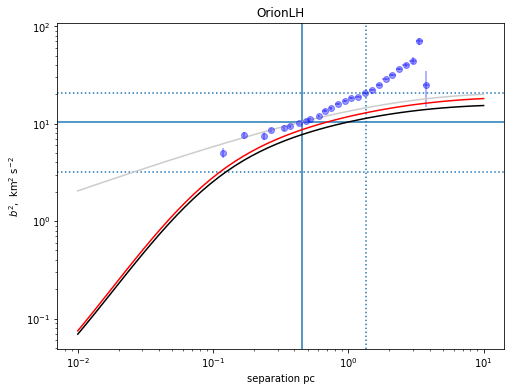

In [16]:
m = 0.5
s0 = VF['s0']
noise = 0.01

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$',
       title=reg,
      )
None

sig2, r0, m, s0, noise

In [17]:
table

s                                                                  \
       count      mean           std       min       25%       50%       75%   
ils                                                                            
7       50.0  4.055407  6.520422e-02  3.985226  4.006700  4.050739  4.078762   
8      896.0  3.697428  1.084762e-01  3.556424  3.626186  3.673462  3.770945   
9     4256.0  3.316693  1.055095e-01  3.168738  3.221676  3.297957  3.389469   
10   10402.0  2.974161  9.765516e-02  2.824908  2.884292  2.962006  3.047414   
11   16710.0  2.652118  8.992860e-02  2.511944  2.568918  2.644433  2.724586   
12   19736.0  2.365525  7.857372e-02  2.238847  2.293486  2.366798  2.432015   
13   20426.0  2.110325  6.739169e-02  1.996667  2.041453  2.112481  2.159959   
14   20134.0  1.882062  6.153904e-02  1.787593  1.820345  1.885327  1.926730   
15   18888.0  1.678814  5.669443e-02  1.588885  1.622040  1.685733  1.719472   
16   17286.0  1.495211  4.858927e-02  1.431170  1.449294  1.494148  1.550348   
17   14580.0  1.332126  4.014547e-02  1.266862  1.289883  1.333266  1.359718   
18   13066.0  1.187783  3.872830e-02  1.123997  1.173849  1.192600  1.216241   
19   10840.0  1.061073  3.341281e-02  1.011305  1.025499  1.066702  1.098897   
20    9028.0  0.949299  2.570621e-02  0.907122  0.931152  0.960980  0.961530   
21    8638.0  0.842060  2.417878e-02  0.799075  0.834849  0.843313  0.859980   
22    6248.0  0.744419  1.793715e-02  0.715585  0.725435  0.754130  0.763260   
23    4876.0  0.669340  2.395045e-02  0.641383  0.642205  0.674473  0.695222   
24    4644.0  0.601469  5.856352e-03  0.595741  0.596230  0.596321  0.608100   
25    3146.0  0.524081  1.290569e-02  0.505610  0.505955  0.533184  0.533314   
26    2760.0  0.488562  5.912521e-03  0.477057  0.491087  0.491682  0.491725   
27    2192.0  0.429890  1.206174e-04  0.429543  0.429827  0.429925  0.429987   
28    2884.0  0.373033  7.813901e-03  0.357792  0.376668  0.377089  0.377129   
29    1144.0  0.337233  8.155094e-05  0.337064  0.337169  0.337253  0.337307   
31    2384.0  0.266605  9.112576e-05  0.266333  0.266586  0.266641  0.266669   
32     624.0  0.238528  2.578780e-15  0.238528  0.238528  0.238528  0.238528   
35    1242.0  0.168616  4.242823e-05  0.168527  0.168581  0.168627  0.168655   
38     648.0  0.119264  1.318179e-15  0.119264  0.119264  0.119264  0.119264   

                  dV2                                                       \
          max   count       mean        std   min     25%    50%       75%   
ils                                                                          
7    4.229287     0.0        NaN        NaN   NaN     NaN    NaN       NaN   
8    3.971009     3.0  24.753333  16.870140  7.29  16.650  26.01   33.4850   
9    3.545478    43.0  70.168837  41.466628  0.25  40.325  62.41  100.0100   
10   3.157638   205.0  44.485610  49.201366  0.00   7.840  28.09   67.2400   
11   2.814499  1123.0  39.992671  52.462866  0.00   4.840  19.36   53.2900   
12   2.507384  2796.0  36.350733  43.131048  0.00   4.840  20.25   51.8400   
13   2.238668  4286.0  31.711575  38.446086  0.00   4.000  18.49   46.2400   
14   1.984871  5387.0  28.571433  35.423601  0.00   3.610  15.21   40.9600   
15   1.772961  5941.0  25.076401  32.808549  0.00   2.890  12.25   36.0000   
16   1.568671  5856.0  22.433263  31.296530  0.00   2.560  10.89   30.2500   
17   1.395936  5356.0  20.728659  30.214449  0.00   1.960   9.61   27.0400   
18   1.245146  4970.0  19.004708  28.440645  0.00   1.690   7.84   24.0100   
19   1.099558  4260.0  18.198505  27.535457  0.00   1.690   7.29   23.0400   
20   0.983474  3636.0  17.135275  25.609856  0.00   1.440   6.76   21.1600   
21   0.868253  3551.0  15.946773  24.343423  0.00   1.325   6.25   19.3600   
22   0.763655  2612.0  14.347171  21.814679  0.00   1.210   5.76   17.8525   
23   0.695419  2131.0  13.624528  19.945323  0.00   1.440   5.76   17.6400   
24   0.608130  1985.0  11.928458  17.029254  0.00 

In [18]:
Orion = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m,
        'box_size': box_size}

In [20]:
f = open('Results\\SF'+ line + '.pkl',"wb")
pickle.dump(Orion,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 18.82891082763672 seconds ---
